<a href="https://colab.research.google.com/github/KennyOwen/Enron/blob/main/Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#run wget command for downloding enrn email data
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-06-04 12:12:43--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Units/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-06-04 12:12:43--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Units/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  25.0MB/s    in 41s     

2023-06-04 12:13:25 (20.0 MB/s

In [2]:
#import library sqlite3
import sqlite3

In [49]:
#establish connection with database
conn = sqlite3.connect('enron.db')

In [50]:
#create cursor object
cursor = conn.cursor()

In [5]:
#check schema of database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cursor.fetchall()
cursor = conn.cursor()

for table in tables:
    print(table[0])

employeelist
message
recipientinfo
referenceinfo


In [6]:
# verifying table
table_name = 'employeelist'
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name=?", (table_name,))
result = cursor.fetchone()

if result:
    print(f"The table '{table_name}' exists in the database.")
else:
    print(f"The table '{table_name}' does not exist in the database.")

The table 'employeelist' exists in the database.


In [7]:
#check scheme of table - employeelist
table_name = 'employeelist'

# Retrieve column information for the table
cursor.execute(f"PRAGMA table_info({table_name})")
columns = cursor.fetchall()

# Print the column information
for column in columns:
    column_name = column[1]
    data_type = column[2]
    nullable = 'NULL' if column[3] else 'NOT NULL'
    primary_key = 'PRIMARY KEY' if column[5] else ''
    print(f"{column_name}: {data_type} {nullable} {primary_key}")

eid: INTEGER NULL PRIMARY KEY
firstName: VARCHAR(31) NULL 
lastName: VARCHAR(31) NULL 
Email_id: VARCHAR(31) NULL 
Email2: VARCHAR(31) NOT NULL 
Email3: VARCHAR(31) NOT NULL 
EMail4: VARCHAR(31) NOT NULL 
folder: VARCHAR(31) NULL 
status: VARCHAR(50) NOT NULL 


In [8]:
#check schema of table - message
table_name = 'message'

# Retrieve column information for the table
cursor.execute(f"PRAGMA table_info({table_name})")
columns = cursor.fetchall()

# Print the column information
for column in columns:
    column_name = column[1]
    data_type = column[2]
    nullable = 'NULL' if column[3] else 'NOT NULL'
    primary_key = 'PRIMARY KEY' if column[5] else ''
    print(f"{column_name}: {data_type} {nullable} {primary_key}")

mid: INTEGER NULL PRIMARY KEY
sender: VARCHAR(127) NULL 
date: DATETIME NOT NULL 
message_id: VARCHAR(127) NOT NULL 
subject: TEXT NOT NULL 
body: TEXT NOT NULL 
folder: VARCHAR(127) NULL 


In [9]:
#check scheme of table - referenceinfo
table_name = 'referenceinfo'

# Retrieve column information for the table
cursor.execute(f"PRAGMA table_info({table_name})")
columns = cursor.fetchall()

# Print the column information
for column in columns:
    column_name = column[1]
    data_type = column[2]
    nullable = 'NULL' if column[3] else 'NOT NULL'
    primary_key = 'PRIMARY KEY' if column[5] else ''
    print(f"{column_name}: {data_type} {nullable} {primary_key}")

rfid: INTEGER NULL PRIMARY KEY
mid: INTEGER NULL 
reference: TEXT NOT NULL 


In [10]:
#check schema of table - recipientinfo
table_name = 'recipientinfo'

# Retrieve column information for the table
cursor.execute(f"PRAGMA table_info({table_name})")
columns = cursor.fetchall()

# Print the column information
for column in columns:
    column_name = column[1]
    data_type = column[2]
    nullable = 'NULL' if column[3] else 'NOT NULL'
    primary_key = 'PRIMARY KEY' if column[5] else ''
    print(f"{column_name}: {data_type} {nullable} {primary_key}")

rid: INTEGER NULL PRIMARY KEY
mid: INTEGER NULL 
rtype: TEXT NOT NULL 
rvalue: VARCHAR(127) NOT NULL 
dater: DATETIME NOT NULL 


In [11]:
#import library - pandas
import pandas as pd

In [12]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
#check date format by writing an sql query to fetch one record from message table
column_type = None
for column in columns:
    if column[1] == column_name:
        column_type = column[2]
        break

# Check the date format based on the column type
if column_type and 'date' in column_type.lower():
    print(f"The column '{column_name}' in table '{table_name}' is a date type.")
else:
    print(f"The column '{column_name}' in table '{table_name}' is not a date type.")


The column 'dater' in table 'recipientinfo' is a date type.


In [ ]:
#check whether there are null values in the record

In [14]:
table_name = 'recipientinfo'
column_name = 'dater'

# Execute the SQL query to fetch one record
cursor.execute(f"SELECT {column_name} FROM {table_name} LIMIT 1")
record = cursor.fetchone()

# Check the date format
if record:
    value = record[0]
    if value is not None and isinstance(value, str):
        try:
            parsed_date = datetime.datetime.strptime(value, '%Y-%m-%d')
            print(f"The column '{column_name}' in table '{table_name}' has the date format 'YYYY-MM-DD'.")
        except ValueError:
            print(f"The column '{column_name}' in table '{table_name}' does not have a valid date format.")
    else:
        print(f"The column '{column_name}' in table '{table_name}' does not contain a date value.")
else:
    print(f"No record found in table '{table_name}'.")

The column 'dater' in table 'recipientinfo' does not contain a date value.


In [42]:
#write sql query to count number of emails per day using strftime and COUNT() 
# Execute the SQL query
cursor.execute("""
    SELECT strftime('%d', date) AS email_day, COUNT(*) AS email_count
    FROM message
    GROUP BY email_day
""")

# Fetch all the results
results = cursor.fetchall()

# Print the results
for row in results:
    email_day, email_count = row
    print(f"Date: {email_day}, Count: {email_count}")

Date: 01, Count: 7854
Date: 02, Count: 6975
Date: 03, Count: 5240
Date: 04, Count: 7498
Date: 05, Count: 8642
Date: 06, Count: 8650
Date: 07, Count: 8597
Date: 08, Count: 7887
Date: 09, Count: 7536
Date: 10, Count: 7407
Date: 11, Count: 7849
Date: 12, Count: 8622
Date: 13, Count: 8310
Date: 14, Count: 8135
Date: 15, Count: 7925
Date: 16, Count: 8402
Date: 17, Count: 7845
Date: 18, Count: 7943
Date: 19, Count: 9493
Date: 20, Count: 8612
Date: 21, Count: 8237
Date: 22, Count: 8264
Date: 23, Count: 7999
Date: 24, Count: 7919
Date: 25, Count: 8979
Date: 26, Count: 10944
Date: 27, Count: 10376
Date: 28, Count: 7624
Date: 29, Count: 8553
Date: 30, Count: 8889
Date: 31, Count: 5553


In [24]:
#convert data in dataframe
# Create a DataFrame from the results
df = pd.DataFrame(results, columns=['Date', 'Count'])

# Print the DataFrame
print(df)

            Date  Count
0     0001-05-30      2
1     0001-06-18      1
2     0001-07-24      1
3     0001-08-01      1
4     0001-08-06      1
...          ...    ...
1318  2020-12-24      1
1319  2020-12-29      1
1320  2043-12-28      1
1321  2044-01-02      1
1322  2044-01-04      2

[1323 rows x 2 columns]


In [25]:
#import library matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


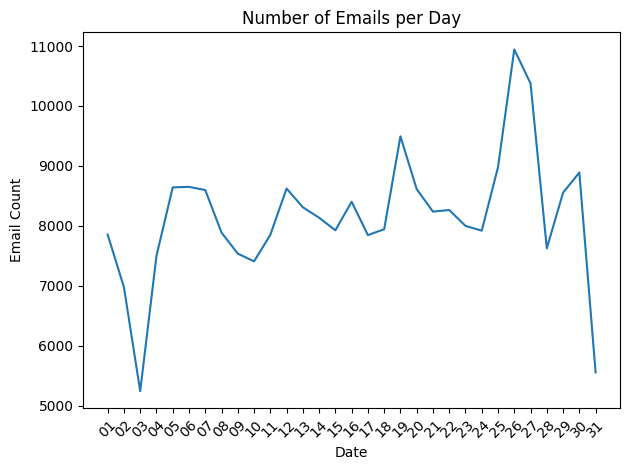

In [38]:
#plot graph
# Separate the x and y values
dates = []
counts = []
for row in results:
    dates.append(row[0])
    counts.append(row[1])

# Plot the graph
plt.plot(dates, counts)
plt.xlabel('Date')
plt.ylabel('Email Count')
plt.title('Number of Emails per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#perform analysis 

The influx of emails varies between the dates throughout a month, with a constant rise at the start and towards the end of the month. The graph shows that the number of emails vary severely throughout with a massive increase to the end dates of the month.

In [43]:
#write sql query to count number of emails per week using strftime and COUNT() 
cursor.execute("""
    SELECT strftime('%W', date) AS email_week, COUNT(*) AS email_count
    FROM message
    GROUP BY email_week
""")

# Fetch all the results
results = cursor.fetchall()

# Print the results
for row in results:
    email_week, email_count = row
    print(f"Week: {email_week}, Count: {email_count}")
#display the dataframe

Week: 00, Count: 1397
Week: 01, Count: 4312
Week: 02, Count: 4597
Week: 03, Count: 4251
Week: 04, Count: 6899
Week: 05, Count: 5352
Week: 06, Count: 3663
Week: 07, Count: 3325
Week: 08, Count: 3665
Week: 09, Count: 3912
Week: 10, Count: 3593
Week: 11, Count: 3685
Week: 12, Count: 3781
Week: 13, Count: 3155
Week: 14, Count: 3459
Week: 15, Count: 4134
Week: 16, Count: 4621
Week: 17, Count: 4941
Week: 18, Count: 4328
Week: 19, Count: 5114
Week: 20, Count: 4955
Week: 21, Count: 4954
Week: 22, Count: 4429
Week: 23, Count: 5661
Week: 24, Count: 2739
Week: 25, Count: 2758
Week: 26, Count: 4372
Week: 27, Count: 2059
Week: 28, Count: 3006
Week: 29, Count: 2901
Week: 30, Count: 2950
Week: 31, Count: 2991
Week: 32, Count: 2940
Week: 33, Count: 3065
Week: 34, Count: 3575
Week: 35, Count: 3784
Week: 36, Count: 3278
Week: 37, Count: 3770
Week: 38, Count: 4532
Week: 39, Count: 5766
Week: 40, Count: 5627
Week: 41, Count: 6471
Week: 42, Count: 9156
Week: 43, Count: 12846
Week: 44, Count: 7961
Week: 45,

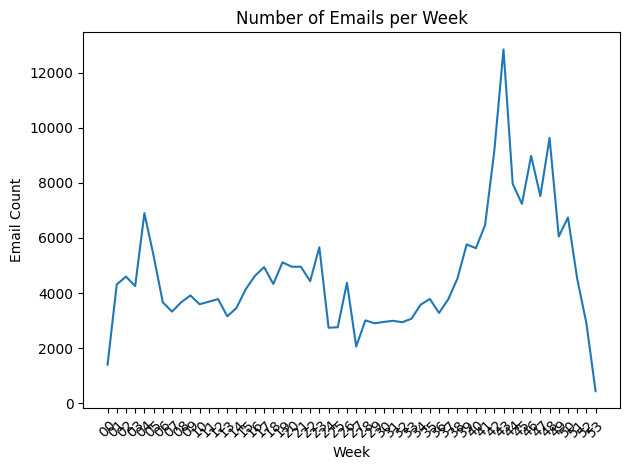

In [46]:
#plot graph

# Separate the x and y values
weeks = []
counts = []
for row in results:
    weeks.append(row[0])
    counts.append(row[1])

# Plot the graph
plt.plot(weeks, counts)
plt.xlabel('Week')
plt.ylabel('Email Count')
plt.title('Number of Emails per Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#perform analysis 

The fluctuation of emails per week vary throughtout the year, with an steady increase throughout the upper quartile of the year and decreasing shortly after.
There is also a drop in emails influx throughout the lower quartile and until entering the upper quartile of the year, showing a trend line of emails in the year.

In [53]:
#write sql query to count number of emails per month using strftime and COUNT() 
# Execute the SQL query
cursor.execute("""
    SELECT strftime('%m', date) AS email_month, COUNT(*) AS email_count
    FROM message
    GROUP BY email_month
""")

# Fetch all the results
results = cursor.fetchall()

# Print the results
for row in results:
    email_month, email_count = row
    print(f"Month: {email_month}, Count: {email_count}")
#convert data in dataframe
#display the dataframe

Month: 01, Count: 22215
Month: 02, Count: 16735
Month: 03, Count: 16421
Month: 04, Count: 18117
Month: 05, Count: 21585
Month: 06, Count: 16877
Month: 07, Count: 12167
Month: 08, Count: 14740
Month: 09, Count: 17746
Month: 10, Count: 38893
Month: 11, Count: 35560
Month: 12, Count: 21703


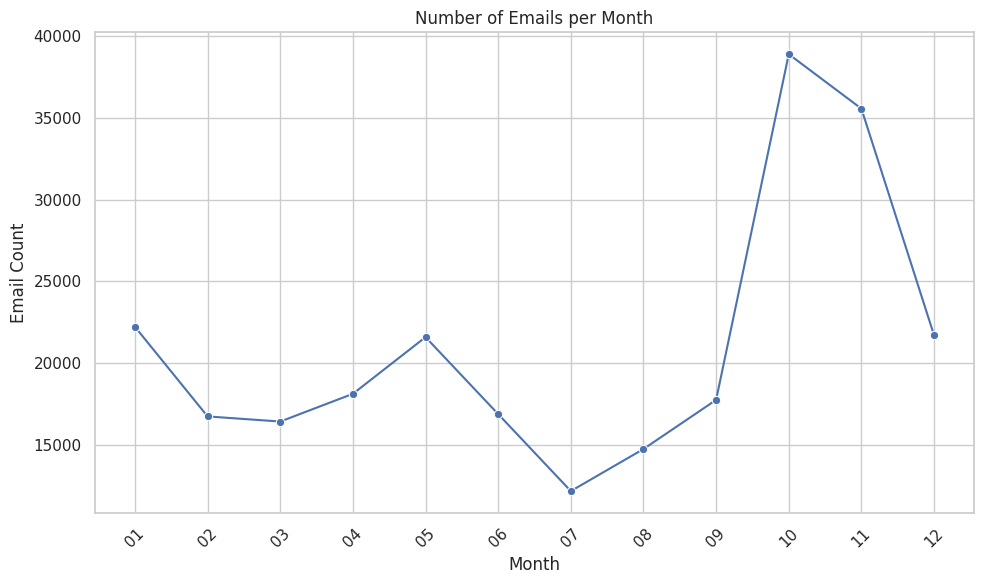

In [54]:
#plot graph using subplots() and lineplot()
# Create a DataFrame from the results
df = pd.DataFrame(results, columns=['Month', 'Count'])

# Plot the graph
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df, x="Month", y="Count", marker='o', ax=ax)
plt.xlabel('Month')
plt.ylabel('Email Count')
plt.title('Number of Emails per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#perform analysis 

This graph is similar to the previous graph for emails per week, in that it basically shows the same data but illustrated through a larger span of set which in this case replaces the week into month. Although it may not be as accurate as the emails per week graph, it is nonehteless more precise to evaluate trend lines and seasonal change according to its distribution.

In [56]:
#write sql query to count top sender using count()
cursor.execute("""
    SELECT sender, COUNT(*) AS email_count
    FROM message
    GROUP BY sender
    ORDER BY email_count DESC
    LIMIT 5
""")

# Fetch all the results
results = cursor.fetchall()

# Print the results
for row in results:
    sender, email_count = row
    print(f"Sender: {sender}, Count: {email_count}")
#convert data in dataframe
#display the dataframe

Sender: jeff.dasovich@enron.com, Count: 6273
Sender: j.kaminski@enron.com, Count: 5838
Sender: kay.mann@enron.com, Count: 5100
Sender: sara.shackleton@enron.com, Count: 4797
Sender: tana.jones@enron.com, Count: 4437


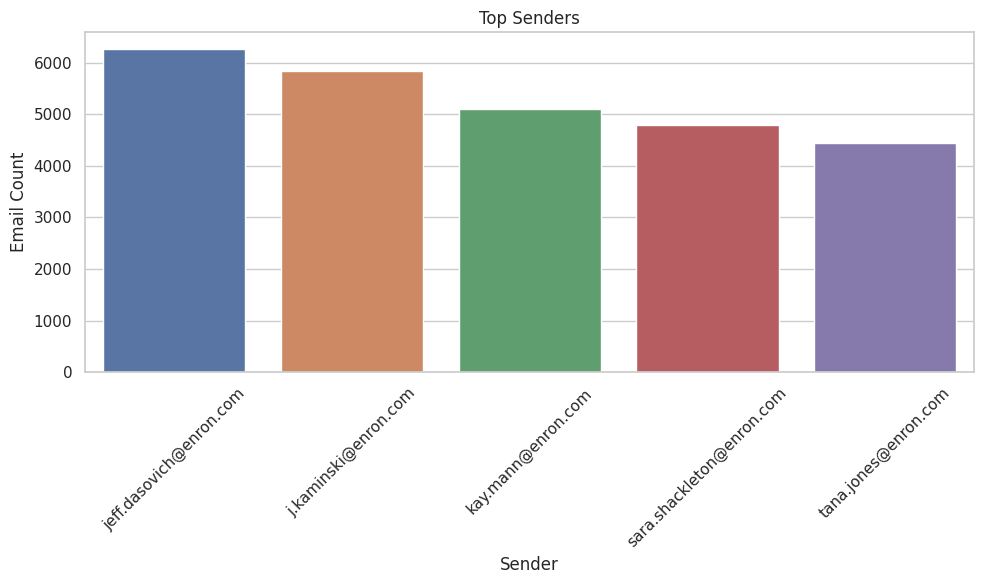

In [57]:
#plot graph using barplot() and show()
df = pd.DataFrame(results, columns=['Sender', 'Count'])

# Plot the graph
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df, x="Sender", y="Count", ax=ax)
plt.xlabel('Sender')
plt.ylabel('Email Count')
plt.title('Top Senders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#perform analysis 

This barchart is simple enough that it shows the top senders email but display them in proportion to their sent amount of emails, we can who sent the most emails and assume a respective ratio according to the barchart and compare them to one another.

In [64]:
#write sql query to count top recipient using count()
cursor.execute("""
    SELECT rvalue, COUNT(*) AS email_count
    FROM recipientinfo
    GROUP BY rvalue
    ORDER BY email_count DESC
    LIMIT 5
""")

# Fetch all the results
results = cursor.fetchall()

# Print the results
for row in results:
    recipient, email_count = row
    print(f"Recipient: {recipient}, Count: {email_count}")
#convert data in dataframe
#display the dataframe

Recipient: no.address@enron.com, Count: 19198
Recipient: jeff.dasovich@enron.com, Count: 11137
Recipient: richard.shapiro@enron.com, Count: 11015
Recipient: steven.j.kean@enron.com, Count: 10873
Recipient: james.d.steffes@enron.com, Count: 10615


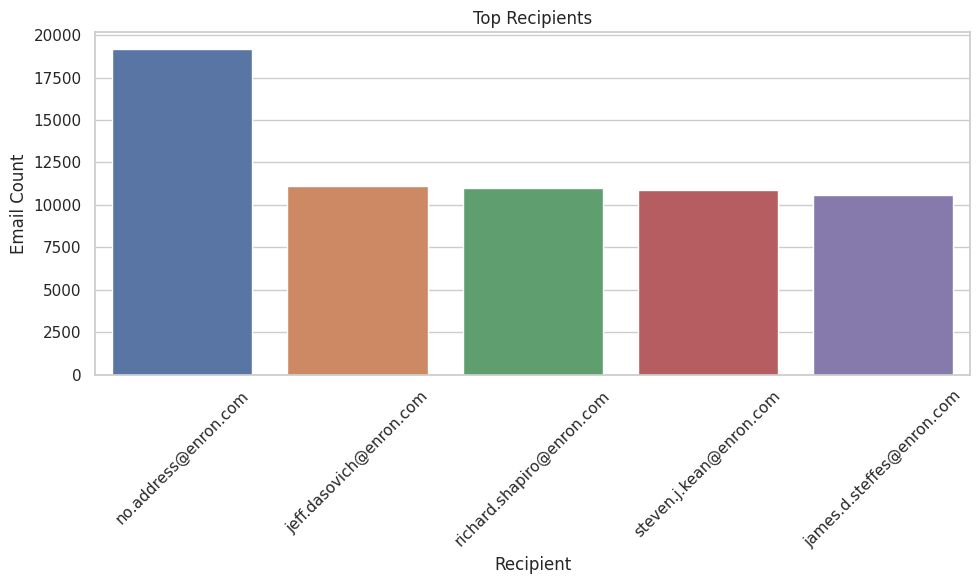

In [65]:
#plot graph using barplot() and show()
df = pd.DataFrame(results, columns=['Recipient', 'Count'])

# Plot the graph
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df, x="Recipient", y="Count", ax=ax)
plt.xlabel('Recipient')
plt.ylabel('Email Count')
plt.title('Top Recipients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#perform analysis 

This barchart is another simple graph illustrating the top recipients.

In [68]:
#write sql query to categorize by rtype using count
cursor.execute("""
    SELECT rtype, COUNT(*) AS rtype_count
    FROM recipientinfo
    GROUP BY rtype
""")

# Fetch all the results
results = cursor.fetchall()

# Print the results
for row in results:
    rtype, rtype_count = row
    print(f"Rtype: {rtype}, Count: {rtype_count}")
#convert data in dataframe
#display the dataframe

Rtype: BCC, Count: 253713
Rtype: CC, Count: 253735
Rtype: TO, Count: 1556994


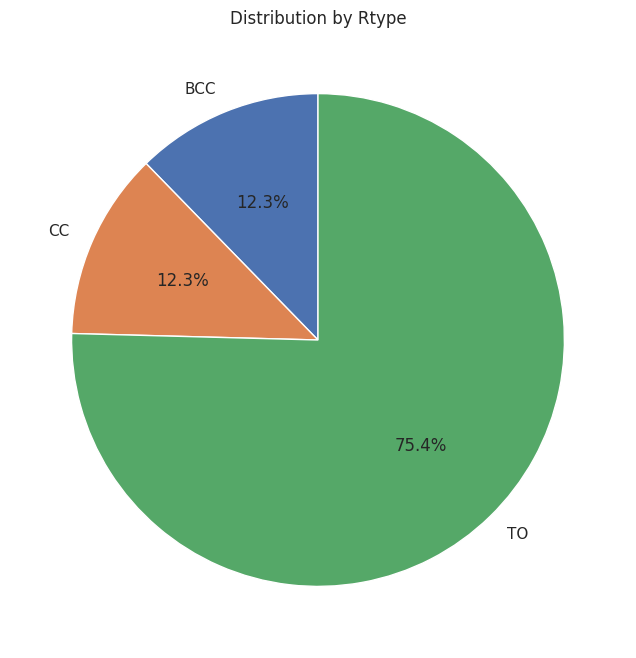

In [69]:
#plot graph using pie() and show()
df = pd.DataFrame(results, columns=['Rtype', 'Count'])

# Plot the graph
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(df['Count'], labels=df['Rtype'], autopct='%1.1f%%', startangle=90)
ax.set_aspect('equal')
plt.title('Distribution by Rtype')
plt.show()

In [ ]:
#perform analysis 

This piechart represent the distribution of emails normally sent and or sent as a carbon copy or blind carbon copy to its recipients.

In [70]:
# Close the cursor and connection
cursor.close()
conn.close()